In [1]:
#import the required datasets for analysis
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import precision_recall_fscore_support

# for Logistic Regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn import metrics,model_selection

# for CART
from sklearn.tree import DecisionTreeClassifier

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df_log = pd.read_excel(r'F:\Personal\PGP\Predictive Modeling\Project\Contraceptive_method_dataset.xlsx')

In [3]:
df_log.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df_log.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [5]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [6]:
df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [7]:
df_log.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [8]:
df_log.duplicated().sum()

80

In [9]:
dups = df_log.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_log.shape)

Number of duplicate rows = 80
(1473, 10)


In [10]:
df_log[dups]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1367,44.0,Tertiary,Tertiary,5.0,Scientology,Yes,1,Very High,Exposed,Yes
1387,NaN,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1423,NaN,Tertiary,Tertiary,2.0,Non-Scientology,No,1,Very High,Exposed,Yes
1440,NaN,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes


In [11]:
df_log.drop_duplicates(inplace=True) 

In [12]:
dups = df_log.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_log.shape)

Number of duplicate rows = 0
(1393, 10)


In [13]:
df_log['Wife_age'].fillna(df_log['Wife_age'].median(),inplace = True)
df_log['No_of_children_born'].fillna(df_log['No_of_children_born'].median(),inplace = True)

In [14]:
df_log.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [15]:
df_cat = df_log.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Wife_ education',
 'Husband_education',
 'Wife_religion',
 'Wife_Working',
 'Standard_of_living_index',
 'Media_exposure',
 'Contraceptive_method_used']

In [16]:
#Univariate Analysis

def univariateAnalysis_category(cat_column):
        print("Details of " + cat_column)
        print("----------------------------------------------------------------")
        print(df_cat[cat_column].value_counts())
        plt.figure(figsize=(4,4))
        df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column,cmap='viridis')
        plt.show()
        print("       ")

Details of Wife_ education
----------------------------------------------------------------
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


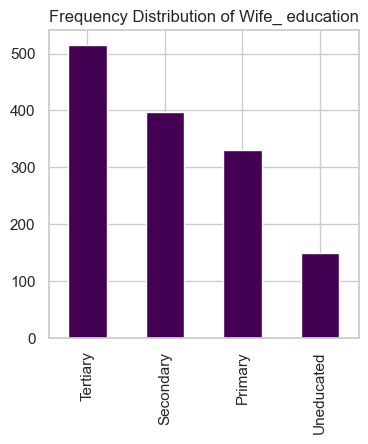

       
Details of Husband_education
----------------------------------------------------------------
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


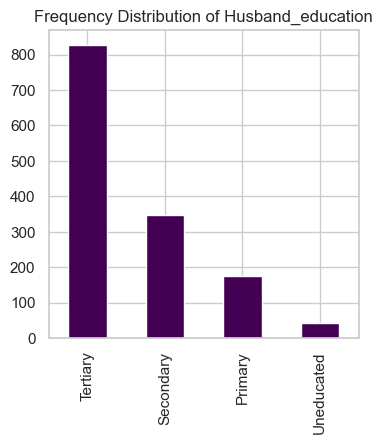

       
Details of Wife_religion
----------------------------------------------------------------
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


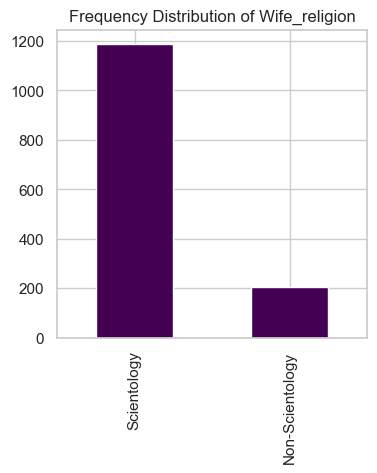

       
Details of Wife_Working
----------------------------------------------------------------
No     1043
Yes     350
Name: Wife_Working, dtype: int64


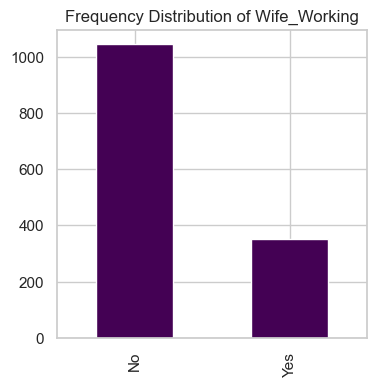

       
Details of Standard_of_living_index
----------------------------------------------------------------
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


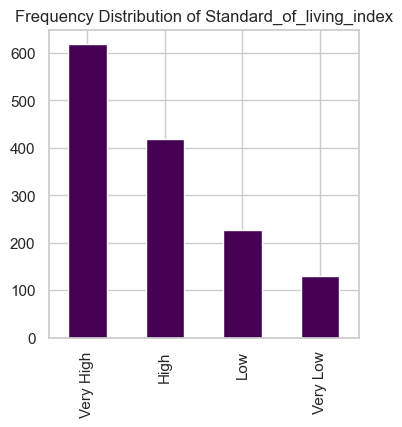

       
Details of Media_exposure
----------------------------------------------------------------
Exposed        1284
Not-Exposed     109
Name: Media_exposure, dtype: int64


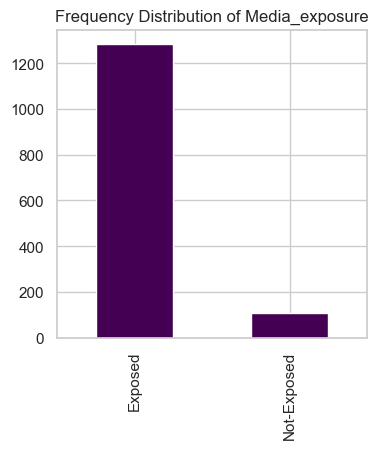

       
Details of Contraceptive_method_used
----------------------------------------------------------------
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64


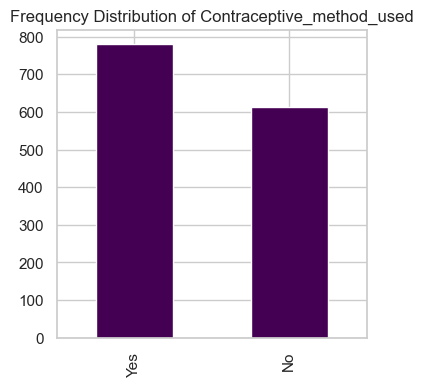

In [17]:
for i in lstcatcolumns:
    univariateAnalysis_category(i)

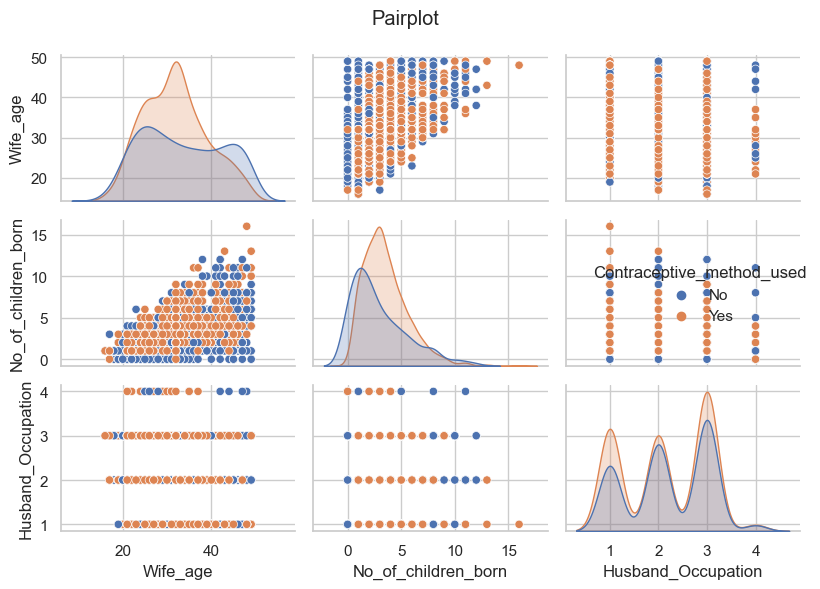

In [18]:
#Bivariate Analysis
pp = sns.pairplot(df_log, hue = 'Contraceptive_method_used', diag_kind = 'kde', height=2)
pp.fig.suptitle("Pairplot")
plt.tight_layout()
plt.show();

In [19]:
df_log_num = df_log.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_log_num.columns.values)
len(lstnumericcolumns)

3

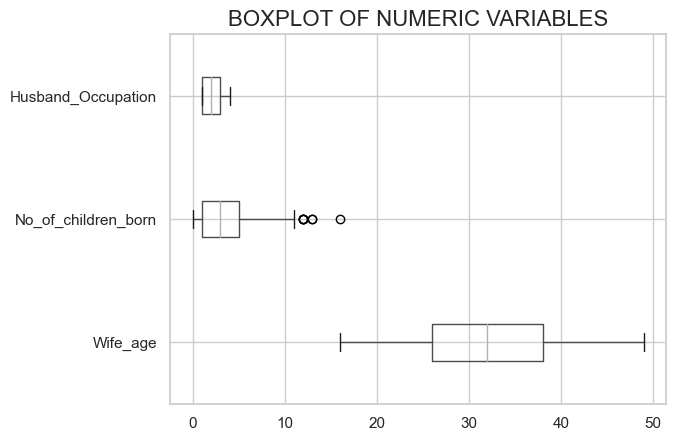

In [20]:
fig, a = plt.subplots()

np.random.seed(1234)
a = df_log_num.boxplot(vert=0, figsize=(8,6), grid=True)
a.set_title('BOXPLOT OF NUMERIC VARIABLES', fontsize = 16)

plt.show();

In [21]:
corr = df_log.corr()
corr

,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.528428,-0.187070
No_of_children_born,0.528428,1.000000,-0.024213
Husband_Occupation,-0.187070,-0.024213,1.000000


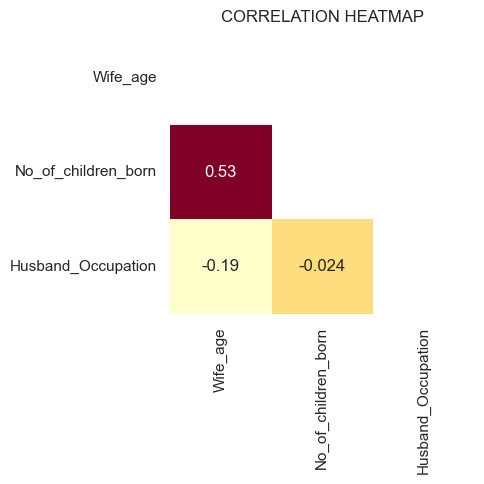

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap= 'YlOrRd',cbar=False,mask = np.triu(corr)).set(title='CORRELATION HEATMAP')
plt.tight_layout()

In [23]:
for feature in df_log.columns: 
    if df_log[feature].dtype == 'object': 
        print(feature)
        print(df_log[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure
Exposed        1284
Not-Exposed     109
Name: Media_exposure, dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




In [24]:
# Changing the Husband occupation to Categorical
df_log['Husband_Occupation'] = df_log['Husband_Occupation'].astype('object')

In [25]:
# Converting the Categorical datails to numbers using pd.CategoricaL
for feature in df_log.columns: 
    if df_log[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_log[feature].unique()))
        print(pd.Categorical(df_log[feature].unique()).codes)
        df_log[feature] = pd.Categorical(df_log[feature]).codes



feature: Wife_ education
['Primary', 'Uneducated', 'Secondary', 'Tertiary']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[0 3 1 2]


feature: Husband_education
['Secondary', 'Primary', 'Tertiary', 'Uneducated']
Categories (4, object): ['Primary', 'Secondary', 'Tertiary', 'Uneducated']
[1 0 2 3]


feature: Wife_religion
['Scientology', 'Non-Scientology']
Categories (2, object): ['Non-Scientology', 'Scientology']
[1 0]


feature: Wife_Working
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Husband_Occupation
[2, 3, 1, 4]
Categories (4, int64): [1, 2, 3, 4]
[1 2 0 3]


feature: Standard_of_living_index
['High', 'Very High', 'Low', 'Very Low']
Categories (4, object): ['High', 'Low', 'Very High', 'Very Low']
[0 2 1 3]


feature: Media_exposure
['Exposed', 'Not-Exposed']
Categories (2, object): ['Exposed', 'Not-Exposed']
[0 1]


feature: Contraceptive_method_used
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [26]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int8   
 2   Husband_education          1393 non-null   int8   
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int8   
 5   Wife_Working               1393 non-null   int8   
 6   Husband_Occupation         1393 non-null   int8   
 7   Standard_of_living_index   1393 non-null   int8   
 8   Media_exposure             1393 non-null   int8   
 9   Contraceptive_method_used  1393 non-null   int8   
dtypes: float64(2), int8(8)
memory usage: 75.8 KB


In [27]:
df_log

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,1,0,0,0
1,45.0,3,1,10.0,1,0,2,2,0,0
2,43.0,0,1,7.0,1,0,2,2,0,0
3,42.0,1,0,9.0,1,0,2,0,0,0
4,36.0,1,1,8.0,1,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,2,2,3.0,1,1,1,2,0,1
1469,33.0,2,2,3.0,1,0,0,2,0,1
1470,39.0,1,1,3.0,1,1,0,2,0,1
1471,33.0,1,1,3.0,1,1,1,1,0,1


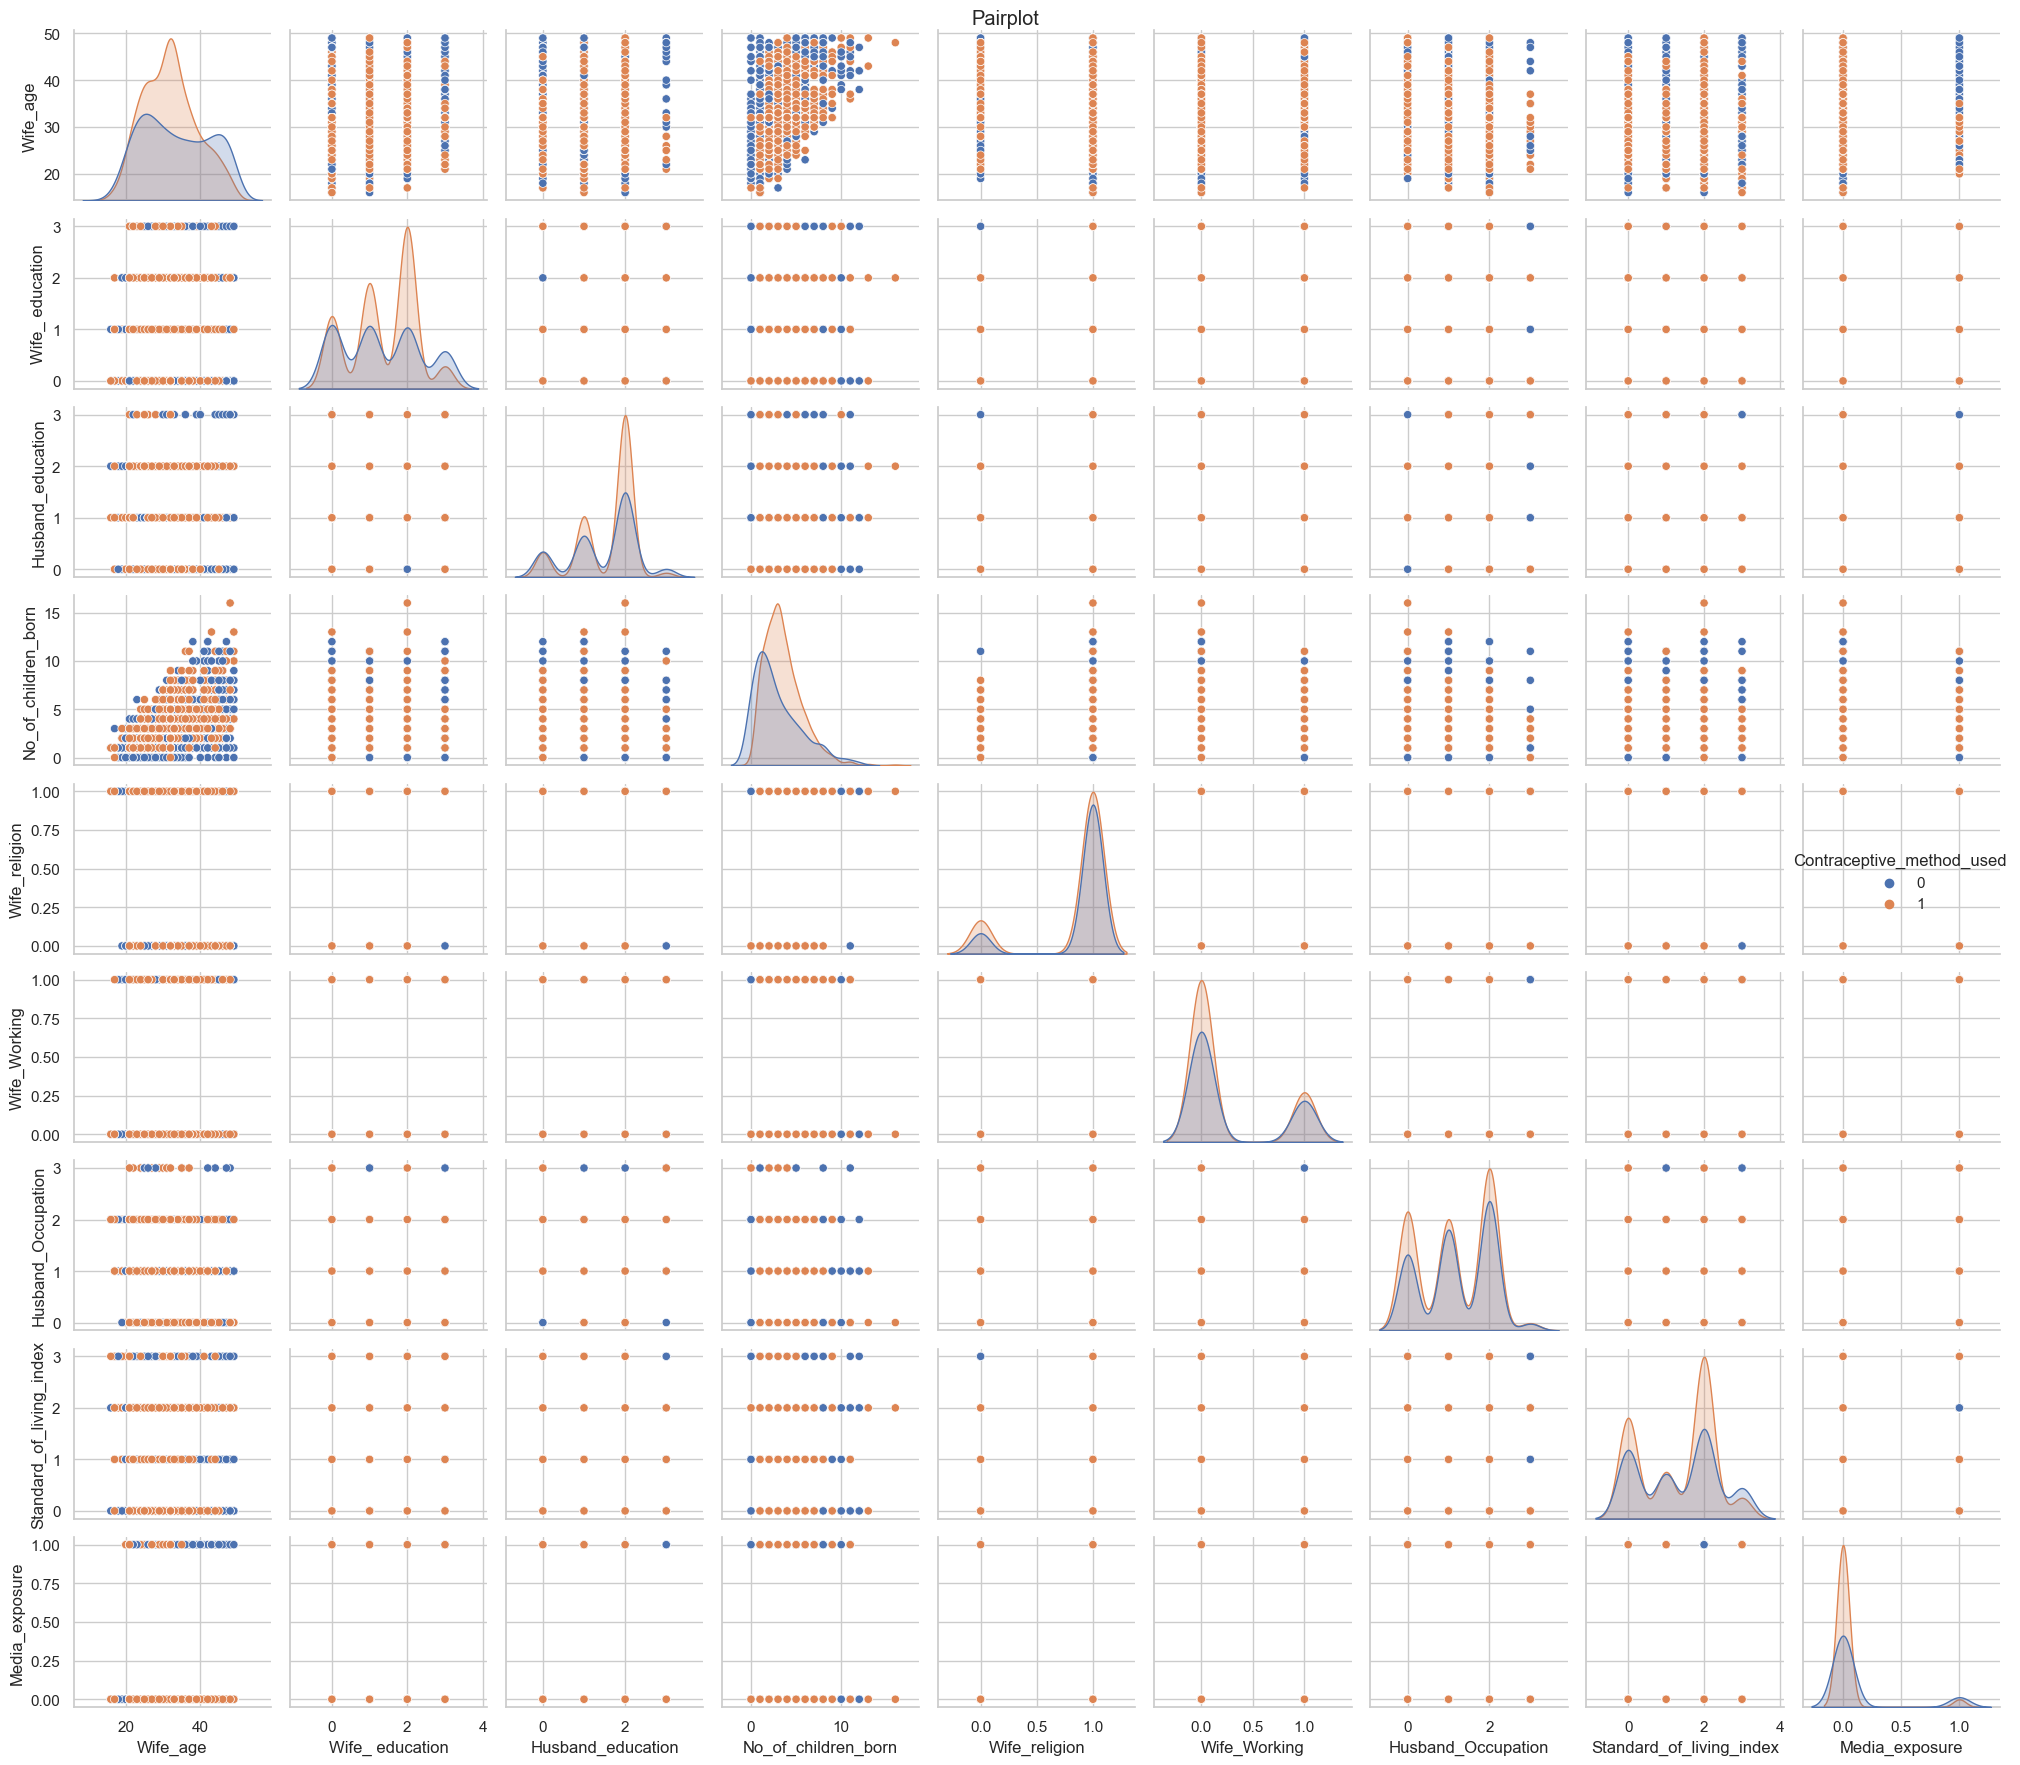

In [28]:
pp = sns.pairplot(df_log, hue = 'Contraceptive_method_used', diag_kind = 'kde', height=2)
pp.fig.suptitle("Pairplot")
plt.tight_layout()
plt.show();

In [29]:
df_model=df_log.drop(['Standard_of_living_index','Wife_Working','Husband_Occupation'],axis = 1)
df_log_model =df_model.copy()
df_lda = df_model.copy()
df_cart = df_model.copy()

In [30]:
# Assign all the predictor variables into X dataframe.
X = df_log_model.drop('Contraceptive_method_used', axis =1 )

# Assign the target variable into y dataframe. 
y = df_log_model['Contraceptive_method_used']

In [31]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify = df_log_model['Contraceptive_method_used'])

In [32]:
# Checking the raito of dependent variable from train
y_train.value_counts(normalize = True)

1    0.558974
0    0.441026
Name: Contraceptive_method_used, dtype: float64

In [33]:
# Checking the raito of dependent variable from test
y_test.value_counts(normalize = True)

1    0.559809
0    0.440191
Name: Contraceptive_method_used, dtype: float64

In [34]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [36]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.306358,0.693642
1,0.648884,0.351116
2,0.422286,0.577714
3,0.297920,0.702080
4,0.282098,0.717902


In [37]:
from sklearn.metrics import precision_recall_fscore_support
ltrain = precision_recall_fscore_support(y_train, model.predict(X_train))
ltrain_acc = model.score(X_train,y_train)

In [38]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6482051282051282

AUC: 0.681


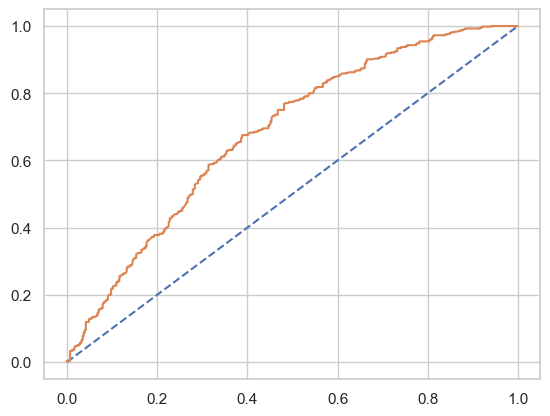

In [39]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [40]:
ltest = precision_recall_fscore_support(y_test, model.predict(X_test))
ltest_acc = model.score(X_test,y_test)

In [41]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6291866028708134

AUC: 0.681


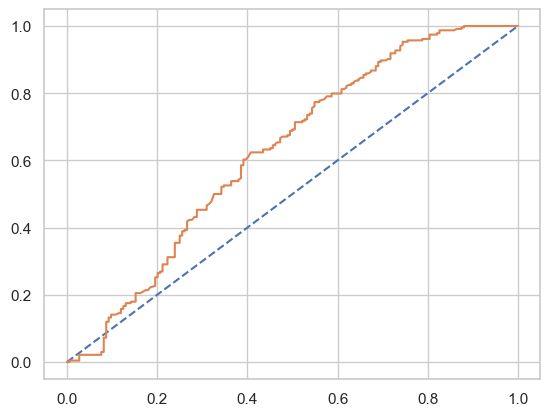

In [42]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

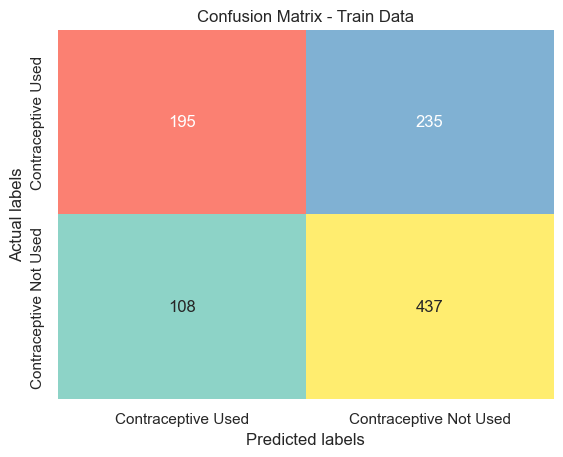

In [43]:
# Confusion Matrix on Train data
cm = metrics.confusion_matrix(y_train, ytrain_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Set3',
xticklabels = ["Contraceptive Used", "Contraceptive Not Used"] ,
yticklabels = ["Contraceptive Used", "Contraceptive Not Used"], cbar =False)

plt.title("Confusion Matrix - Train Data")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show();

In [44]:
# Performance measures using Classification report on training set
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.64      0.45      0.53       430
           1       0.65      0.80      0.72       545

    accuracy                           0.65       975
   macro avg       0.65      0.63      0.63       975
weighted avg       0.65      0.65      0.64       975



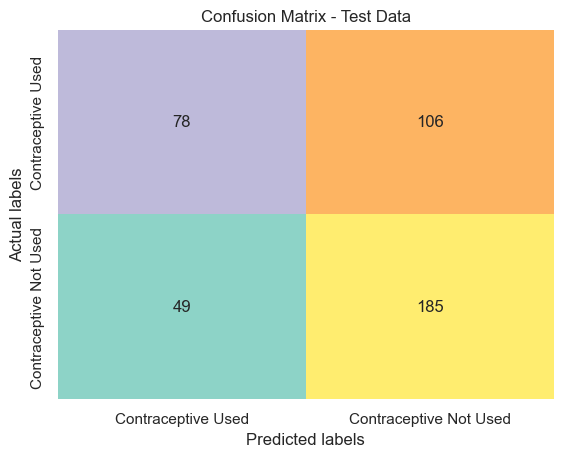

In [45]:
# Confusion Matrix on Test data
cm = metrics.confusion_matrix(y_test, ytest_predict) 
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Set3',
xticklabels = ["Contraceptive Used", "Contraceptive Not Used"] ,
yticklabels = ["Contraceptive Used", "Contraceptive Not Used"], cbar =False)

plt.title("Confusion Matrix - Test Data")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show();

In [46]:
# Performance measures using Classification report on Test set
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.42      0.50       184
           1       0.64      0.79      0.70       234

    accuracy                           0.63       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.63      0.63      0.62       418



In [47]:
Log_Matrix= {'Train Accuracy':round(model.score(X_train,y_train),2),
             'Test Accuracy':round(model.score(X_test,y_test),2),
             'Train Precision':round(list(ltrain[0])[1],2),
             'Test Precision':round(list(ltest[0])[1],2),
             'Train Recall':round(list(ltrain[1])[1],2),
             'Test Recall': round(list(ltest[1])[1],2),
             'Train F1 Score':round(list(ltrain[2])[1],2),
             'Test F1 Score': round(list(ltest[2])[1],2)
            }

In [48]:
Log_Matrix

{'Train Accuracy': 0.65,
 'Test Accuracy': 0.63,
 'Train Precision': 0.65,
 'Test Precision': 0.64,
 'Train Recall': 0.8,
 'Test Recall': 0.79,
 'Train F1 Score': 0.72,
 'Test F1 Score': 0.7}

### GridSearchCV for Logistic Regression

In [49]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [50]:
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [51]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [53]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none', solver='sag')


In [54]:
best_model = grid_search.best_estimator_

In [55]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [56]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.306063,0.693937
1,0.650473,0.349527
2,0.422727,0.577273
3,0.294368,0.705632
4,0.278208,0.721792


              precision    recall  f1-score   support

           0       0.65      0.46      0.54       430
           1       0.65      0.80      0.72       545

    accuracy                           0.65       975
   macro avg       0.65      0.63      0.63       975
weighted avg       0.65      0.65      0.64       975
 



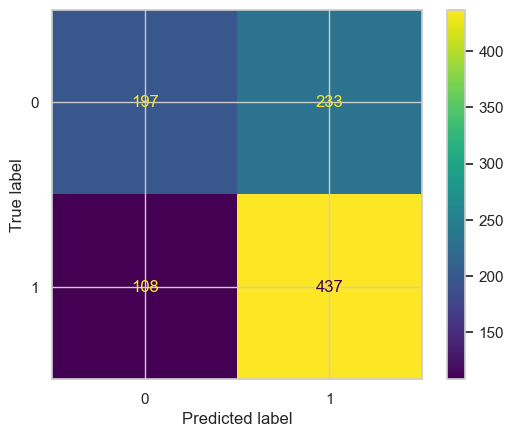

In [57]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.61      0.42      0.50       184
           1       0.64      0.79      0.70       234

    accuracy                           0.63       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.63      0.63      0.62       418
 



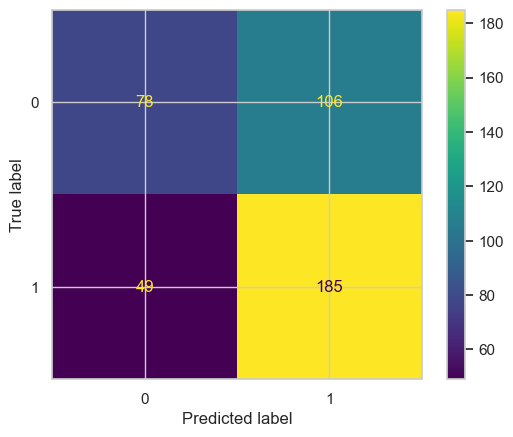

In [58]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [59]:
## Import the model
import statsmodels.formula.api as sm

In [60]:
df_log_model.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [61]:
## Cleaning the coulmn names
df_log_model.columns = df_log_model.columns.str.replace(' ', '')
df_log_model.columns = df_log_model.columns.str.replace('.', '')
df_log_model.columns = df_log_model.columns.str.replace('-', '')

In [62]:
df_log_model.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

In [63]:
A1 = 'Contraceptive_method_used ~Wife_age+Wife_education+Husband_education+No_of_children_born+Wife_religion+Media_exposure'

In [64]:
model_1 = sm.logit(formula =A1, data =df_log_model).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.636352
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1393
Model:                                 Logit   Df Residuals:                     1386
Method:                                  MLE   Df Model:                            6
Date:                       Tue, 22 Nov 2022   Pseudo R-squ.:                 0.07253
Time:                               20:58:22   Log-Likelihood:                -886.44
converged:                              True   LL-Null:                       -955.76
Covariance Type:                   nonrobust   LLR p-value:                 1.941e-27
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.8822      0.333      5.658      0.000       1.230       2.534
Wife_age               -0.0740      0.009     -8.082      0.000      -0.092      -0.056
Wife_education          0.1750      0.064      2.720      0.007       0.049       0.301
Husband_education       0.1775      0.081      2.195      0.028       0.019       0.336
No_of_children_born     0.2816      0.032      8.780      0.000       0.219       0.344
Wife_religion          -0.6645      0.169     -3.927      0.000      -0.996      -0.333
Media_exposure         -1.2084      0.234     -5.162      0.000      -1.667      -0.750
=======================================================================================
"""

# LDA

In [65]:
df_lda

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,0
1,45.0,3,1,10.0,1,0,0
2,43.0,0,1,7.0,1,0,0
3,42.0,1,0,9.0,1,0,0
4,36.0,1,1,8.0,1,0,0
...,...,...,...,...,...,...,...
1468,33.0,2,2,3.0,1,0,1
1469,33.0,2,2,3.0,1,0,1
1470,39.0,1,1,3.0,1,0,1
1471,33.0,1,1,3.0,1,0,1


In [66]:
# Seperating the dependent and independent variables
X = df_lda.drop('Contraceptive_method_used',axis=1)
Y = df_lda.pop('Contraceptive_method_used')

In [67]:
# Splitting the data into 70:30
# Starify means in the same proporation/ ratio as dependent variable
X_train1,X_test1,Y_train1,Y_test1 = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [68]:
# Checking on the split
print('Number of rows and columns of the training set for the independent variables:',X_train1.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train1.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test1.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test1.shape)

Number of rows and columns of the training set for the independent variables: (975, 6)
Number of rows and columns of the training set for the dependent variable: (975,)
Number of rows and columns of the test set for the independent variables: (418, 6)
Number of rows and columns of the test set for the dependent variable: (418,)


In [69]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train1,Y_train1)

In [70]:
#intercept value
clf.intercept_ 

array([1.66080376])

In [71]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.07366475,  0.17815771,  0.33143477,  0.29081974, -0.72129096,
        -1.09393143]])

In [72]:
X_train1.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Media_exposure'],
      dtype='object')

In [73]:
## Getting the equation
round(pd.DataFrame(clf.coef_.reshape(1,-1),columns=X_train1.columns),2).T

,0
Wife_age,-0.07
Wife_ education,0.18
Husband_education,0.33
No_of_children_born,0.29
Wife_religion,-0.72
Media_exposure,-1.09


In [74]:
# Writing the equation
for i in range(0,X_train1.shape[1]):
    print('{} * {}'.format(np.round(clf.coef_[0][i],2),X_train1.columns[i]),end=' (+) ')

-0.07 * Wife_age (+) 0.18 * Wife_ education (+) 0.33 * Husband_education (+) 0.29 * No_of_children_born (+) -0.72 * Wife_religion (+) -1.09 * Media_exposure (+) 

In [75]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.07,  0.18,  0.33,  0.29, -0.72, -1.09]])

In [76]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train1)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test1)

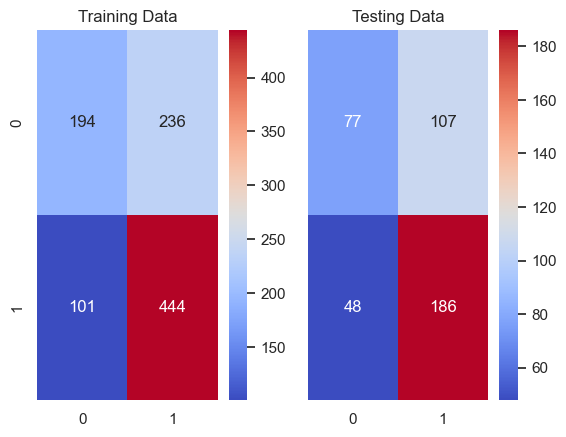

In [77]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train1,pred_class_train)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test1,pred_class_test)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Testing Data');
# ".g" - general expression -  help in converting scientific expression into numbers example 5.23 e-03 = 523 

In [78]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train1,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test1,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.45      0.54       430
           1       0.65      0.81      0.72       545

    accuracy                           0.65       975
   macro avg       0.66      0.63      0.63       975
weighted avg       0.66      0.65      0.64       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.62      0.42      0.50       184
           1       0.63      0.79      0.71       234

    accuracy                           0.63       418
   macro avg       0.63      0.61      0.60       418
weighted avg       0.63      0.63      0.61       418
 



In [79]:
ltrain1 = precision_recall_fscore_support(Y_train1,model1.predict(X_train1))
ltrain_acc = model1.score(X_train1,Y_train1)

In [80]:
# Accuracy - Train Data
model1.score(X_train1,Y_train1)

0.6543589743589744

In [81]:
ltest1 = precision_recall_fscore_support(Y_test1, model1.predict(X_test1))
ltest_acc = model1.score(X_test1,Y_test1)

In [82]:
# Accuracy - Test Data
model1.score(X_test1,Y_test1)

0.6291866028708134

In [83]:
# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train1)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test1)

AUC for the Training Data: 0.680
AUC for the Test Data: 0.627


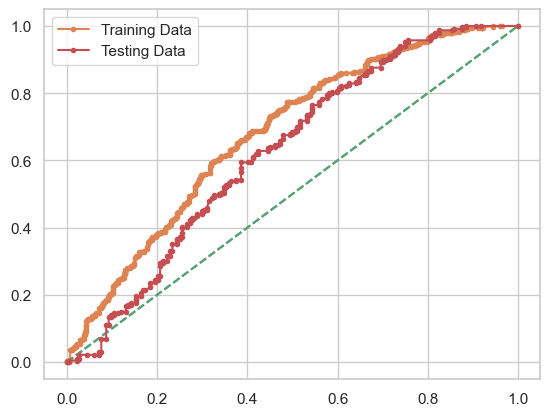

In [84]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train1,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train1,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test1,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test1,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Testing Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [85]:
LDA_Matrix = {'Train Accuracy':round(model1.score(X_train1,Y_train1),2),
             'Test Accuracy':round(model1.score(X_test1,Y_test1),2),
             'Train Precision':round(list(ltrain1[0])[1],2),
             'Test Precision':round(list(ltest1[0])[1],2),
             'Train Recall':round(list(ltrain1[1])[1],2),
             'Test Recall': round(list(ltest1[1])[1],2),
             'Train F1 Score':round(list(ltrain1[2])[1],2),
             'Test F1 Score': round(list(ltest1[2])[1],2)
            }

In [86]:
LDA_Matrix

{'Train Accuracy': 0.65,
 'Test Accuracy': 0.63,
 'Train Precision': 0.65,
 'Test Precision': 0.63,
 'Train Recall': 0.81,
 'Test Recall': 0.79,
 'Train F1 Score': 0.72,
 'Test F1 Score': 0.71}

# CART

In [87]:
df_cart

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Media_exposure,Contraceptive_method_used
0,24.0,0,1,3.0,1,0,0
1,45.0,3,1,10.0,1,0,0
2,43.0,0,1,7.0,1,0,0
3,42.0,1,0,9.0,1,0,0
4,36.0,1,1,8.0,1,0,0
...,...,...,...,...,...,...,...
1468,33.0,2,2,3.0,1,0,1
1469,33.0,2,2,3.0,1,0,1
1470,39.0,1,1,3.0,1,0,1
1471,33.0,1,1,3.0,1,0,1


In [88]:
# Checking the ratio of dependent variables
df_cart.Contraceptive_method_used.value_counts(normalize=True)

1    0.559225
0    0.440775
Name: Contraceptive_method_used, dtype: float64

In [89]:
# CART
# Seperating the dependent and independent variables
X = df_cart.drop('Contraceptive_method_used', axis=1)

y = df_cart.pop('Contraceptive_method_used')

X.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Media_exposure
0,24.0,0,1,3.0,1,0
1,45.0,3,1,10.0,1,0
2,43.0,0,1,7.0,1,0
3,42.0,1,0,9.0,1,0
4,36.0,1,1,8.0,1,0


In [90]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, train_labels2, test_labels2 = train_test_split(X, y, test_size=.30, random_state=1)

In [91]:
# Checking the number of observations in all the 4 splits -  train and test (2 independent and 2 dependent variables)
print('X_train2',X_train2.shape)
print('X_test2',X_test2.shape)
print('train_labels2',train_labels2.shape)
print('test_labels2',test_labels2.shape)
print('Total Obs',975+418)

X_train2 (975, 6)
X_test2 (418, 6)
train_labels2 (975,)
test_labels2 (418,)
Total Obs 1393


In [92]:
# Initialise a Decision Tree Classifier
dt_model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [93]:
dt_model1 = DecisionTreeClassifier(criterion = 'gini',max_depth = 10,min_samples_leaf = 50,min_samples_split = 100,random_state = 1)
dt_model1.fit(X_train2,train_labels2)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=1)

In [94]:
dt_model1.score(X_train2,train_labels2)

0.7117948717948718

In [95]:
dt_model1.score(X_test2,test_labels2)

0.6650717703349283

In [96]:
Feature_imp = pd.DataFrame()
Feature_imp["Features"]= X_train2.columns
Feature_imp['Importance'] = round(pd.Series(dt_model1.feature_importances_),3)
Feature_imp_sorted = Feature_imp.sort_values(by ="Importance", ascending =False)
Feature_imp_sorted

,Features,Importance
3,No_of_children_born,0.547
0,Wife_age,0.325
1,Wife_ education,0.097
2,Husband_education,0.031
4,Wife_religion,0.000
5,Media_exposure,0.000


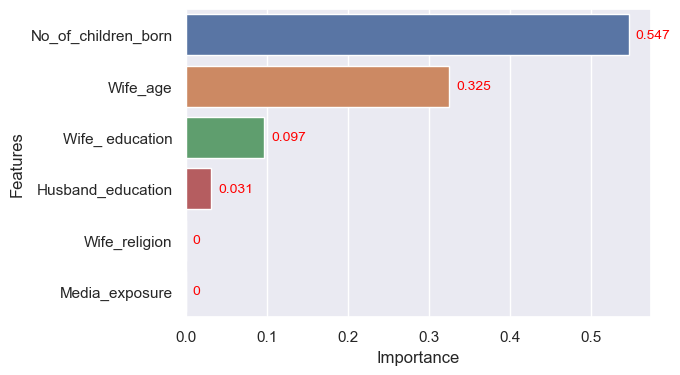

In [97]:
# Visualising the Feature Importance
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x = "Importance", y = "Features", data =Feature_imp_sorted);
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =5);

In [98]:
y_predict = dt_model1.predict(X_test2)

In [99]:
ytrain_predict = dt_model1.predict(X_train2)
ytest_predict = dt_model1.predict(X_test2)

In [100]:
ytrain_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,

In [101]:
ytrain_predict1 = dt_model1.predict_proba(X_train2)
ytest_predict1 = dt_model1.predict_proba(X_test2)

AUC: 0.775


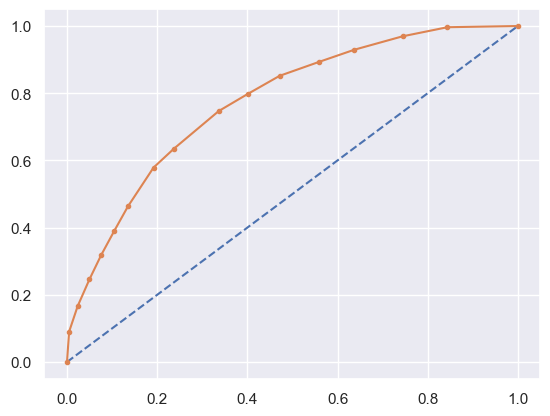

In [102]:
# AUC and ROC for the training data

# predict probabilities
probs = dt_model1.predict_proba(X_train2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels2, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.712


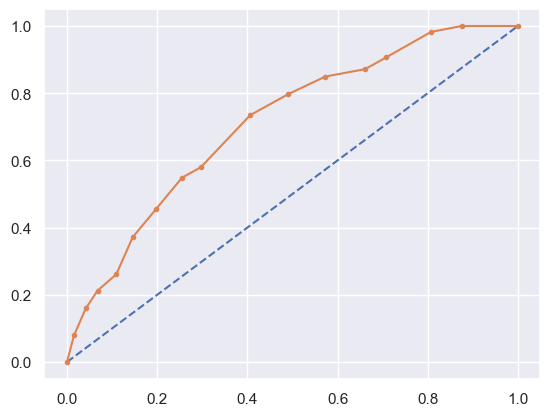

In [103]:
# AUC and ROC for the test data


# predict probabilities
probs = dt_model1.predict_proba(X_test2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels2, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [104]:
print(classification_report(train_labels2, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       422
           1       0.72      0.80      0.76       553

    accuracy                           0.71       975
   macro avg       0.71      0.70      0.70       975
weighted avg       0.71      0.71      0.71       975



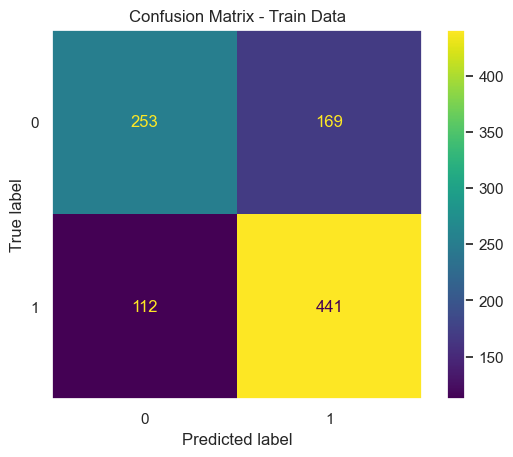

In [105]:
plot_confusion_matrix(dt_model1, X_train2, train_labels2)
plt.title('Confusion Matrix - Train Data')
plt.grid(b=None)

In [106]:
print(classification_report(test_labels2, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58       192
           1       0.66      0.80      0.72       226

    accuracy                           0.67       418
   macro avg       0.67      0.65      0.65       418
weighted avg       0.67      0.67      0.66       418



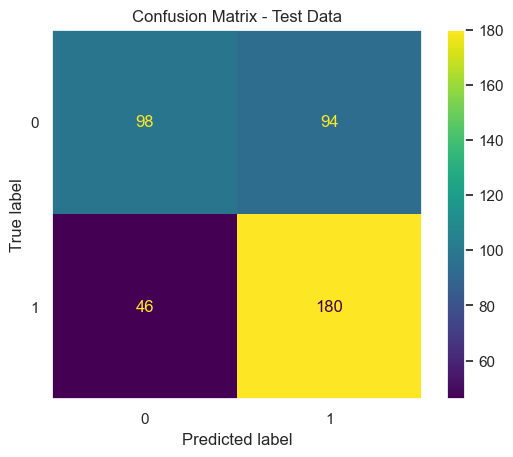

In [107]:
plot_confusion_matrix(dt_model1, X_test2, test_labels2)
plt.title('Confusion Matrix - Test Data')
plt.grid(b=None)

In [108]:
ltrain2 = precision_recall_fscore_support(train_labels2,dt_model1.predict(X_train2))
ltrain_acc = dt_model1.score(X_train2,train_labels2)

In [109]:
dt_model1.score(X_train2,train_labels2)

0.7117948717948718

In [110]:
ltest2 = precision_recall_fscore_support(test_labels2, ytest_predict)
ltest_acc = dt_model1.score(X_test2,test_labels2)

In [111]:
dt_model1.score(X_test2,test_labels2)

0.6650717703349283

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,10,20,30,50],
    'max_features': [4,6,8],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,200],
    }

clf = DecisionTreeClassifier(criterion = 'gini', random_state=1)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10, n_jobs =-1)

grid_search.fit(X_train2, train_labels2)

grid_search.best_params_
best_grid = grid_search.best_estimator_
ytrain_predict = best_grid.predict(X_train2)
ytest_predict = best_grid.predict(X_test2)
#Share Confusion Matrix , AUC & ROC and Classification report

In [113]:
# Understanding the complexity of our current tree
path = dt_model1.cost_complexity_pruning_path(X_train2, train_labels2)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [114]:
# Finding the threshold error
dt_model_data = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
    dt_model.fit(X_train2, train_labels2)
    dt_model_data.append(dt_model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(dt_model_data[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 673 with ccp_alpha: 0.04336317615599222


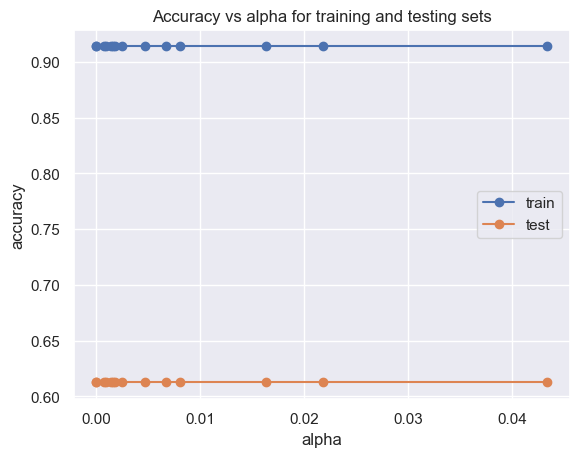

In [115]:
train_scores = [dt_model.score(X_train2, train_labels2) for dt_model in dt_model_data]
test_scores = [dt_model.score(X_test2,test_labels2) for dt_model in dt_model_data]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [116]:
dt_model_ = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
dt_model_.fit(X_train2, train_labels2)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [117]:
dt_model_.score(X_train2,train_labels2)

0.6738461538461539

In [118]:
ytest_pred = dt_model_.predict(X_test2)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels2,ytest_pred)

0.65311004784689

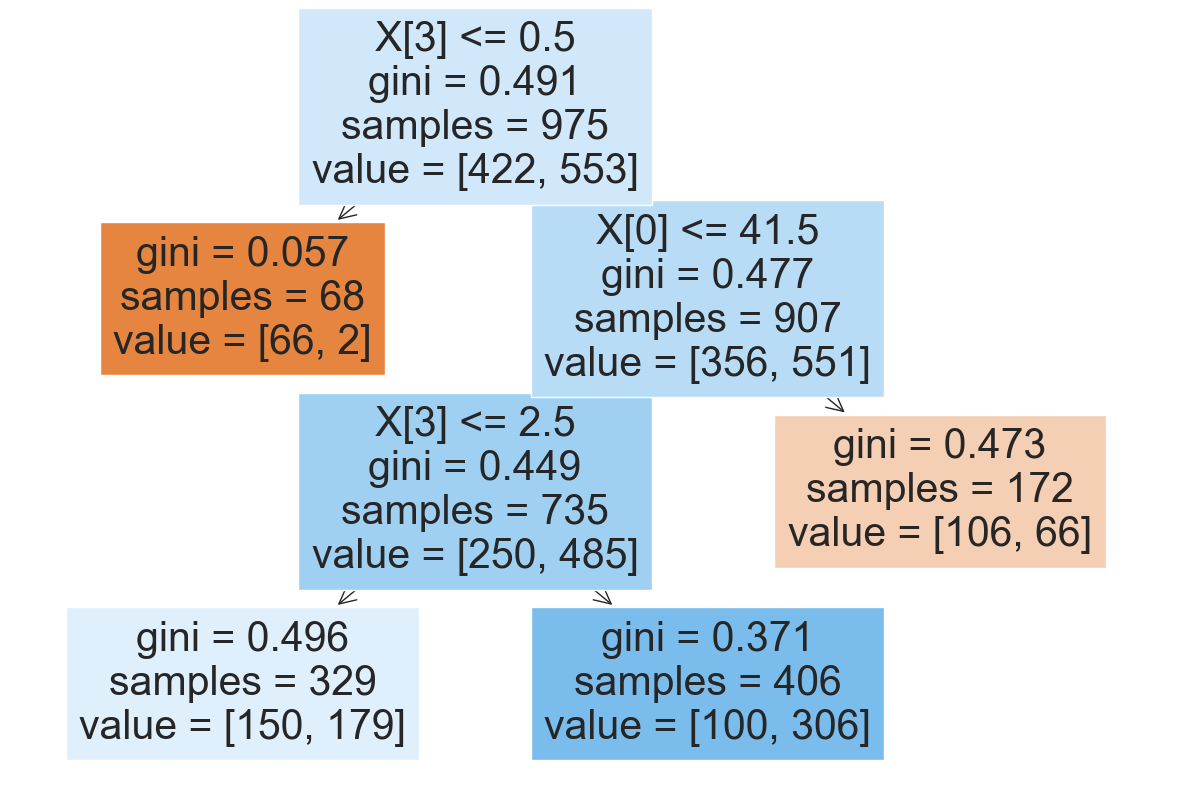

In [120]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model_,filled=True);

In [121]:
CART_Matrix= {'Train Accuracy':round(dt_model1.score(X_train2,train_labels2),2),
             'Test Accuracy':round(dt_model1.score(X_test2,test_labels2),2),
             'Train Precision':round(list(ltrain2[0])[1],2),
             'Test Precision':round(list(ltest2[0])[1],2),
             'Train Recall':round(list(ltrain2[1])[1],2),
             'Test Recall': round(list(ltest2[1])[1],2),
             'Train F1 Score':round(list(ltrain2[2])[1],2),
             'Test F1 Score': round(list(ltest2[2])[1],2)
            }

In [122]:
CART_Matrix

{'Train Accuracy': 0.71,
 'Test Accuracy': 0.67,
 'Train Precision': 0.72,
 'Test Precision': 0.66,
 'Train Recall': 0.8,
 'Test Recall': 0.8,
 'Train F1 Score': 0.76,
 'Test F1 Score': 0.72}

In [123]:
Comp_matrix = pd.DataFrame({'Log_Matrix': pd.Series(Log_Matrix),'LDA_Matrix':pd.Series(LDA_Matrix),'CART_Matrix':pd.Series(CART_Matrix)}).reset_index()

In [124]:
Comp_matrix

,index,Log_Matrix,LDA_Matrix,CART_Matrix
0,Train Accuracy,0.65,0.65,0.71
1,Test Accuracy,0.63,0.63,0.67
2,Train Precision,0.65,0.65,0.72
3,Test Precision,0.64,0.63,0.66
4,Train Recall,0.80,0.81,0.80
5,Test Recall,0.79,0.79,0.80
6,Train F1 Score,0.72,0.72,0.76
7,Test F1 Score,0.70,0.71,0.72
